<a href="https://colab.research.google.com/github/i-am-U-hyUn/webs-youtube/blob/main/01_week_mission_booster_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1주차 미션 소개 - 머신러닝 과정 이해하기

* 미션 목적
    * 머신러닝 모델을 실행하는 기본 과정을 이해하기 (학습 => 예측 => 평가)
    * Scikit-learn API 기본 사용법 익히기
    * 학습을 하기 위해 학습, 예측 데이터를 나누는 방법
    * 학습(train, 기출문제, 정답이 있음), 예측(test, 실전 문제, 정답이 없음)
    * 학습(fit)과 예측(predict)을 하고 평가를 하는 방법
    * 머신러닝 알고리즘 중에 좋은 성능을 내는 boosting 알고리즘의 기본이 되는 DecisionTree 를 사용
    * DecisionTree 의 기본적인 원리 이해하기
    
* 미션 데이터셋 소개

    * 해당 Kaggle 데이터셋( https://www.kaggle.com/blastchar/telco-customer-churn )은 통신사 고객 이탈(Churn)에 대한 정보를 담고 있습니다. IBM에서 제공한 이 데이터셋은 고객 유지에 필요한 행동을 예측하는 데 사용될 수 있으며, 고객 데이터를 분석하여 고객 유지 프로그램을 개발하는 데 도움이 됩니다.
    * 해당 데이터셋은 다음의 정보로 구성되어 있습니다.
        * 고객 인구 통계 정보(Demographic info): 고객의 성별, 연령대, 배우자 및 부양 가족의 유무(Gender, SeniorCitizen, Partner, Dependents) 등에 관한 정보가 포함되어 있습니다.
        * 고객 이탈(Churn) 정보: 서비스를 중단 여부에 대한 정보가 포함되어 있습니다.
        * 서비스 가입 정보(Services subscribed): 고객들이 가입한 서비스들, 예를 들어 전화, 다중 라인, 인터넷, 온라인 보안, 온라인 백업, 장치 보호, 기술 지원, 스트리밍 TV 및 영화( honeService, MultipleLine, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) 등에 대한 정보가 있습니다.
        * 고객 계정 정보(Customer account info): 고객이 얼마나 오래 서비스를 이용했는지, 계약 유형, 결제 방법, 무페이퍼 청구 여부, 월별 요금, 총 요금 (CustomerID, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Tenure)등의 정보가 담겨 있습니다.


* 해당 미션으로 시도해 볼 수 있는 현실 세계 문제
    * 이탈 예측 모델링: 가장 일반적인 사용 사례로, 고객의 이탈 가능성을 예측하는 모델을 구축합니다. 이러한 모델은 고객의 과거 데이터와 행동 패턴을 분석하여 누가 이탈할 가능성이 높은지 예측합니다.

    * 고객 세분화: 고객을 다양한 그룹으로 세분화하여, 특정 그룹이 왜 더 높은 이탈률을 보이는지 이해할 수 있습니다. 이를 통해 타겟 마케팅 전략을 개발하거나 특정 고객 그룹에 더 맞춤화된 서비스를 제공할 수 있습니다.

    * 원인 분석: 머신러닝 모델을 사용하여 고객 이탈의 주요 원인을 파악할 수 있습니다. 예를 들어, 서비스 품질, 가격, 고객 서비스 경험 등 다양한 요인이 고객 이탈에 어떤 영향을 미치는지 분석할 수 있습니다. 피처의 중요도를 파악하고 어떤 요인이 이탈의 중요한 피처인지를 확인해 봅니다.

    * 추천 시스템 개선: 이탈 위험이 있는 고객에게 맞춤형 서비스나 제품을 추천하여 고객 만족도를 높이고 이탈률을 줄일 수 있습니다.

    * 고객 유지 전략 개발: 이탈 예측 모델을 활용해 고위험 고객을 식별하고, 이들을 대상으로 특별 프로모션, 개선된 고객 서비스, 맞춤형 커뮤니케이션 전략 등을 제공하여 이탈률을 줄일 수 있습니다.

    * 정책 및 서비스 개선: 모델에서 도출된 인사이트를 바탕으로 비즈니스 정책, 제품, 서비스를 개선하여 전반적인 고객 경험을 향상시킬 수 있습니다.



In [ ]:
# 미션 진행을 위해 필요한 라이브러리를 로드합니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 미션 수행을 위해 데이터를 로드합니다.
df = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")
df.shape

(7043, 20)

In [ ]:
# 데이터 프레임에서 가장 앞에 있는 N개의 행을 출력합니다.
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [ ]:
# 데이터 집합과 각 열들의 자료형을 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [ ]:
# df.isnull().sum()는 컬럼별로 결측치의 합계를 구합니다.
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# df.isnull().sum().sum() 전체 결측치의 합계를 구합니다.
df.isnull().sum().sum()

0

In [ ]:
# 숫자형태로 된 문자열을 숫자형으로 바꿔줍니다.
# 공백문자 등의 결측치가 들어있다면 .str.strip()을 통해 공백문자를 제거합니다.
# .replace("", np.nan) 는 공백문자를 결측치로 변경해 줍니다.
# .astype(float) 으로 수치형태로 변환해 줍니다.
df["TotalCharges"] = df["TotalCharges"].str.strip().replace("", np.nan).astype(float)

In [ ]:
df["TotalCharges"].head()

customerID
7590-VHVEG      29.85
5575-GNVDE    1889.50
3668-QPYBK     108.15
7795-CFOCW    1840.75
9237-HQITU     151.65
Name: TotalCharges, dtype: float64

In [ ]:
# 결측치를 채워주는 방법도 있지만 일단 제거하도록 합니다.
# 결측치를 채우는 방법도 여러 가지가 있는데 여기에서는 결측치 11개는 그렇게 결측치가 많은 편이 아니고
# 임의의 수로 채워준다면 실제값과 유사한 값을 알아서 채워주지 않으면 오히려 예측의 성능이 떨어질 수 있습니다.
# 예를 들어 아무숫자로 채우기위해 0으로 채운다면 실제 낸 금액은 훨씬 많을텐데 모델을 더 혼란스럽게 만들 수 있습니다.
# 중간값, 평균값 등의 대푯값으로 채운다면 해당 데이터에서 제공하는
# 인구통계학적인 정보, 구독정보 등을 참고해서 해당 세그먼트에서의 대푯값으로 채우는 것을 추천합니다.
df = df.dropna()
df.isnull().sum().sum()

0

In [ ]:
# 바이너리 변수 인코딩을 위해 범주 값이 2개로 되어 있어 이진값으로 인코딩이 가능한 변수를 찾습니다.
nuniq = df.nunique()
bi_cols = nuniq[nuniq == 2].index
bi_cols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'Churn'],
      dtype='object')

In [ ]:
df[bi_cols]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn
customerID,,,,,,,
7590-VHVEG,Female,0,Yes,No,No,Yes,No
5575-GNVDE,Male,0,No,No,Yes,No,No
3668-QPYBK,Male,0,No,No,Yes,Yes,Yes
7795-CFOCW,Male,0,No,No,No,No,No
9237-HQITU,Female,0,No,No,Yes,Yes,Yes
...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,Yes,Yes,No
2234-XADUH,Female,0,Yes,Yes,Yes,Yes,No
4801-JZAZL,Female,0,Yes,Yes,No,Yes,No


In [ ]:
# 바이너리 변수에 대한 인코딩
df["gender_encode"] = (df["gender"] == "Male").astype(int)
df["Partner_encode"] = (df["Partner"] == "Yes").astype(int)
df["Dependents_encode"] = (df["Dependents"] == "Yes").astype(int)
df["PhoneService_encode"] = (df["PhoneService"] == "Yes").astype(int)
df["PaperlessBilling_encode"] = (df["PaperlessBilling"] == "Yes").astype(int)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_encode,Partner_encode,Dependents_encode,PhoneService_encode,PaperlessBilling_encode
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Yes,Electronic check,29.85,29.85,No,0,1,0,0,1
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,Mailed check,56.95,1889.50,No,1,0,0,1,0
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Yes,Mailed check,53.85,108.15,Yes,1,0,0,1,1
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,Bank transfer (automatic),42.30,1840.75,No,1,0,0,0,0
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Yes,Electronic check,70.70,151.65,Yes,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Mailed check,84.80,1990.50,No,1,1,1,1,1
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,Credit card (automatic),103.20,7362.90,No,0,1,1,1,1
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,Yes,Electronic check,29.60,346.45,No,0,1,1,0,1


In [ ]:
# 정답의 빈도수 확인
df["Churn"].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [ ]:
# value_counts(1) => normalize=True 와 같습니다.
df["Churn"].value_counts(1)

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

<Axes: xlabel='Churn', ylabel='count'>

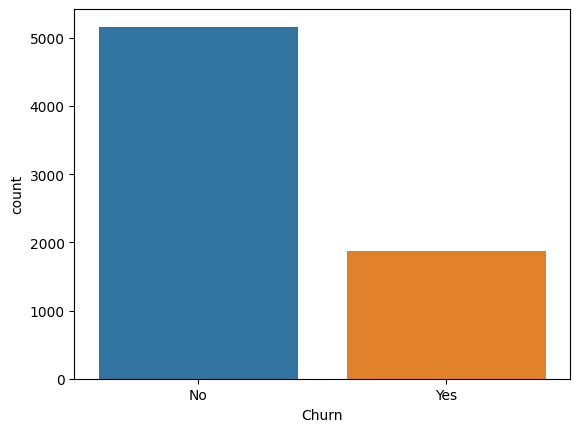

In [ ]:
sns.countplot(data=df, x="Churn")


## 미션 1) - 학습, 예측 데이터셋 나누기

<img src="https://i.imgur.com/yvBtRtJ.png" width="600">

* X_train : feature_names 에 해당되는 컬럼만 train에서 가져옵니다.
    * 학습(훈련)에 사용할 데이터셋 예) 시험의 기출문제

* X_test : feature_names 에 해당되는 컬럼만 test에서 가져옵니다.
    * 예측에 사용할 데이터셋 예) 실전 시험문제

* y_train : label_name 에 해당 되는 컬럼만 train에서 가져옵니다.
    * 학습(훈련)에 사용할 정답 값 예) 기출문제의 정답
    
* y_test : label_name 에 해당 되는 컬럼만 test에서 가져옵니다.
    * 예측에 사용할 정답 값 예) 실전 문제의 정답
    
    
* 아래의 형태로 데이터셋을 나누되, train 데이터셋의 shape 는 (5625, 9), test 데이터셋의 shape 는 (1407, 9) 이 되도록 합니다. 행의 customerID 는 섞여도 상관 없으며 아래와 순서가 달라도 되며, train, test의 shape 값의 행의 수가 8:2 로 나뉘면 됩니다.


| customerID   |   SeniorCitizen |   tenure |   MonthlyCharges |   TotalCharges |   gender_encode |   Partner_encode |   Dependents_encode |   PhoneService_encode |   PaperlessBilling_encode |
|:-------------|----------------:|---------:|-----------------:|---------------:|----------------:|-----------------:|--------------------:|----------------------:|--------------------------:|
| 7590-VHVEG   |               0 |        1 |            29.85 |          29.85 |               0 |                1 |                   0 |                     0 |                         1 |
| 5575-GNVDE   |               0 |       34 |            56.95 |        1889.5  |               1 |                0 |                   0 |                     1 |                         0 |


| customerID   |   SeniorCitizen |   tenure |   MonthlyCharges |   TotalCharges |   gender_encode |   Partner_encode |   Dependents_encode |   PhoneService_encode |   PaperlessBilling_encode |
|:-------------|----------------:|---------:|-----------------:|---------------:|----------------:|-----------------:|--------------------:|----------------------:|--------------------------:|
| 2320-JRSDE   |               0 |        1 |             19.9 |          19.9  |               0 |                1 |                   1 |                     1 |                         1 |
| 2087-QAREY   |               0 |       22 |             54.7 |        1178.75 |               0 |                1 |                   0 |                     1 |                         1 |

    
   
### 학습, 예측에 사용할 컬럼


In [ ]:
# 학습, 예측에 사용할 컬럼에 이름 지정합니다.
# 범주형 데이터(object, category)는 전처리가 따로 필요합니다.
# 간단하게 모델을 만들어보기 위해 수치 데이터만 사용합니다.
feature_names = df.select_dtypes(include="number").columns
feature_names

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_encode', 'Partner_encode', 'Dependents_encode',
       'PhoneService_encode', 'PaperlessBilling_encode'],
      dtype='object')

### 정답값이자 예측해야 될 값

In [ ]:
# label_name 이라는 변수에 예측할 컬럼(Churn)의 이름을 담습니다.
label_name = "Churn"
label_name

'Churn'

### 문제(feature)와 답안(label)을 나누기

* X, y를 만들어 줍니다.
* X는 feature, 독립변수, 예) 시험의 문제
* y는 label, 종속변수, 예) 시험의 정답

* 결과는 다음과 같은 형태로 나오도록 합니다.

* X 값 출력 예시 입니다.

| customerID   |   SeniorCitizen |   tenure |   MonthlyCharges |   TotalCharges |   gender_encode |   Partner_encode |   Dependents_encode |   PhoneService_encode |   PaperlessBilling_encode |
|:-------------|----------------:|---------:|-----------------:|---------------:|----------------:|-----------------:|--------------------:|----------------------:|--------------------------:|
| 7590-VHVEG   |               0 |        1 |            29.85 |          29.85 |               0 |                1 |                   0 |                     0 |                         1 |
| 5575-GNVDE   |               0 |       34 |            56.95 |        1889.5  |               1 |                0 |                   0 |                     1 |                         0 |


* y 값 출력 예시 입니다.

| customerID   | Churn   |
|:-------------|:--------|
| 7590-VHVEG   | No      |
| 5575-GNVDE   | No      |

* 데이터의 행과 열의 수 입니다.
    * X 의 shape 출력 (7032, 9)
    * y 의 shape 출력 (7032,)

In [ ]:
# X, y를 만들어 줍니다.
# 물음표를 채워 독립변수(X)와 종속변수(y)를 나눠주세요.
# scikit-learn에서 데이터는 대문자 X(2차원,행렬)로 표시하고 정답은 소문자 y(1차원,벡터)로 표기합니다.
X = df[feature_names]
y = df[label_name]
display(X.head(2))
display(y.head(2))
X.shape, y.shape

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_encode,Partner_encode,Dependents_encode,PhoneService_encode,PaperlessBilling_encode
customerID,,,,,,,,,
7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1
5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0


customerID
7590-VHVEG    No
5575-GNVDE    No
Name: Churn, dtype: object

((7032, 9), (7032,))

### 학습, 예측 데이터셋 만들기
* X_train : 학습 세트 만들기, 행렬, 판다스의 데이터프레임, 2차원 리스트(배열) 구조,  예) 시험의 기출문제
* y_train : 정답 값을 만들기, 벡터, 판다스의 시리즈, 1차원 리스트(배열) 구조, 예) 기출문제의 정답
* X_test : 예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제
* y_test : 예측의 정답값 예) 실전 시험 문제의 정답


* 10회까지의 모의고사 문제집이 있다고 가정할 때
* 1~8회는 공부한다 풀어보고 : model.fit(X_train, y_train)
* 9, 10회는 실전 문제처럼 풀어보고 : model.predict(X_test) => 결과를 y_predict 로 만들고
* 채점하는 과정으로 학습과 예측을 할 예정입니다. : y_test, y_predict 실제값과 예측값을 비교해서 채점하게 됩니다.

In [ ]:
# 데이터의 행과 열의 개수를 확인합니다.
df.shape

(7032, 25)

* 학습, 예측 데이터셋을 나눌 때는  5:5, 8:2, 7:3 등으로 나눌수도 있지만 학습데이터를 더 많이 나누는게 좋습니다.
* 공부를 더 많이 하고 시험을 봐야지 시험을 더 잘 볼 수있기 때문입니다.
* 8:2 를 기준으로 나눕니다. 아래의 내용은 tain.head(2), test.head(2)로 위에 있는 데이터를 미리보기 한 모습으로 예시 입니다.


* X_train 출력 예시 입니다.

| customerID   |   SeniorCitizen |   tenure |   MonthlyCharges |   TotalCharges |   gender_encode |   Partner_encode |   Dependents_encode |   PhoneService_encode |   PaperlessBilling_encode |
|:-------------|----------------:|---------:|-----------------:|---------------:|----------------:|-----------------:|--------------------:|----------------------:|--------------------------:|
| 7590-VHVEG   |               0 |        1 |            29.85 |          29.85 |               0 |                1 |                   0 |                     0 |                         1 |
| 5575-GNVDE   |               0 |       34 |            56.95 |        1889.5  |               1 |                0 |                   0 |                     1 |                         0 |

* X_test 출력 예시 입니다.

| customerID   |   SeniorCitizen |   tenure |   MonthlyCharges |   TotalCharges |   gender_encode |   Partner_encode |   Dependents_encode |   PhoneService_encode |   PaperlessBilling_encode |
|:-------------|----------------:|---------:|-----------------:|---------------:|----------------:|-----------------:|--------------------:|----------------------:|--------------------------:|
| 2320-JRSDE   |               0 |        1 |             19.9 |          19.9  |               0 |                1 |                   1 |                     1 |                         1 |
| 2087-QAREY   |               0 |       22 |             54.7 |        1178.75 |               0 |                1 |                   0 |                     1 |                         1 |

* X_train, X_test 의 shape 출력 예시 입니다.
(5625, 9), (1407, 9)

In [ ]:
# train 과 test 로 나누기 위해 데이터를 기준을 정합니다.
split_count = int(df.shape[0] * 0.8)
split_count

5625

* 다음 빈칸을 채워 학습, 예측 데이터셋을 만들어 주세요.
* 빈칸을 채우는 방법 외 다른 방법으로 나눠도 됩니다.

In [ ]:
# 데이터의 80%을 나눌 기준 인덱스(split_count)로 문제 데이터(X)를 train, test로 나눕니다.
# 데이터의 80%을 나눌 기준 인덱스(split_count)로 정답 데이터(y)를 train, test로 나눕니다.
X_train = X[:split_count]
y_train = y[:split_count]

X_test = X[split_count:]
y_test = y[split_count:]

print("* 데이터가 잘 나뉘었는지 shape 값을 통해 확인해 보세요.")

X_train.shape, X_test.shape, y_train.shape, y_test.shape

* 데이터가 잘 나뉘었는지 shape 값을 통해 확인해 보세요.


((5625, 9), (1407, 9), (5625,), (1407,))

클래스가 여러 개 일 경우에 클래스의 수가 train, test에 균일하게 나뉘지 않을 수도 있습니다.
train_test_split() 등의 기능을 사용하면 label값을 균형있게 나눠줄 수도 있습니다.
예를 들어 이탈여부를 예측하는데 이탈안한다 한다가 7:3 정도로 train에 있다면  test 에도 7:3 으로 들어있어야 제대로 학습하고 예측할 수 있습니다.
임의로 순서대로 나눴다면 train 에는 8:2 로 들어있는데 test 에는 6:4 로 들어있다면 예측의 성능이 떨어질 수도 있습니다.
불균형한 클래스를 다룰 때는 정답의 클래스를 같은 비율로 만들어 줄 때 언더샘플링, 오버샘플링(KNN) 등의 방법을 사용합니다.

## 미션 2 - 머신러닝 알고리즘 모델을 통한 학습과 예측을 해주세요.

* 강의에 있는 DecisionTree 를 사용해도 되며, 사이킷런의 다른 모델을 사용해도 됩니다.
다음과 같이 예측값이 나오도록 예측해 주세요.
<font color="red"> 이탈여부의 Yes, No 는 예시로 다음의 결과와 달라도 상관 없습니다.</font>

```python
# y_predict[:5] 를 출력했을 때 아래처럼 이탈 여부에 대한 값이 나옵니다.
array(['No', 'No', 'No', 'No', 'No'], dtype=object)
```

* 사이킷런에서 좋은 성능을 내고 주목받고 있는 알고리즘을 별도의 라이브러리로 공개되어 있는 것들이 다음과 같습니다.
    * 부스팅계열 알고리즘(주로 정형 데이터) => XGBoost, LightGBM, CatBoost 등
    * 신경망 알고리즘(주로 비정형 데이터) => TensorFlow, Keras, PyTorch 등
    
* 알고리즘 중에는 분류, 회귀에 따로 사용할 수 있는 것도 있고, 분류, 회귀에 모두 사용할 수 있는 것도 있습니다.
    * 회귀 알고리즘 => 분류(로지스틱 회귀), 회귀(릿지, 라쏘, 엘라스틱넷) 분류에 사용하는 알고리즘과 회귀에 사용하는게 다릅니다.
    * 분류 및 회귀 트리(Classification And Regression Tree, CART) => 분류와 회귀에 모두 사용할 수 있습니다.
    
    
    
    
* [참고 : 결정 트리 학습법 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC_%ED%95%99%EC%8A%B5%EB%B2%95)
    * 결과를 해석하고 이해하기 쉽다.간략한 설명만으로 결정 트리를 이해하는 것이 가능하다.
    * 자료를 가공할 필요가 거의 없다.다른 기법들의 경우 자료를 정규화하거나 임의의 변수를 생성하거나 값이 없는 변수를 제거해야 하는 경우가 있다.
    * 수치 자료와 범주 자료 모두에 적용할 수 있다.다른 기법들은 일반적으로 오직 한 종류의 변수를 갖는 데이터 셋을 분석하는 것에 특화되어 있다. (일례로 신경망 학습은 숫자로 표현된 변수만을 다룰 수 있는 것에 반해 관계식(relation rules)은 오직 명목 변수만을 다룰 수 있다.
    * 화이트박스 모델을 사용한다. 모델에서 주어진 상황이 관측 가능하다면 불 논리를 이용하여 조건에 대해 쉽게 설명할 수 있다. (결과에 대한 설명을 이해하기 어렵기 때문에 인공신경망은 대표적인 블랙 박스 모델이다.)
    * 안정적이다. 해당 모델 추리의 기반이 되는 명제가 다소 손상되었더라도 잘 동작한다.
    * 대규모의 데이터 셋에서도 잘 동작한다. 방대한 분량의 데이터를 일반적인 컴퓨터 환경에서 합리적인 시간 안에 분석할 수 있다.


```python
DecisionTreeClassifier(
    *,
    criterion='gini', # 분할방법 {"gini", "entropy"}, default="gini"
    splitter='best',
    max_depth=None, # The maximum depth of the tree
    min_samples_split=2, # The minimum number of samples required to split an internal node
    min_samples_leaf=1, # The minimum number of samples required to be at a leaf node.
    min_weight_fraction_leaf=0.0, # The minimum weighted fraction of the sum total of weights
    max_features=None, # The number of features to consider when looking for the best split
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
```

* 주요 파라미터
    * criterion: 가지의 분할의 품질을 측정하는 기능입니다.
    * max_depth: 트리의 최대 깊이입니다.
    * min_samples_split:내부 노드를 분할하는 데 필요한 최소 샘플 수입니다.
    * min_samples_leaf: 리프 노드에 있어야 하는 최소 샘플 수입니다.
    * max_leaf_nodes: 리프 노드 숫자의 제한치입니다.
    * random_state: 추정기의 무작위성을 제어합니다. 실행했을 때 같은 결과가 나오도록 합니다.
    
    
```python
# max_depth == 1 트리의 깊이를 의미합니다.
# max_features == 0.9 라면 전체 피처의 90% 만 사용합니다.
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="gini",
                               max_depth=15,
                               max_features=0.9,
                               random_state=42)
model
```

* 머신러닝 모델의 성능을 개선하는 방법
    * 데이터 분할
    * 데이터 전처리, 결측치 처리
    * 피처 선택, 피처 엔지니어링(스케일링, 변환, 인코딩 등)
    * 모델의 `파라미터 값을 변경하는 방법`
    
* <font color="red">머신러닝 알고리즘 모델을 통한 학습과 예측을 해주세요.</font>

In [ ]:
# 사이킷런(sklearn)에서 의사 결정 트리 분류모델(DecisionTreeClassifier)을 로드합니다.
# 위 설명에서 제시한 주요 파라미터의 설정을 변경해서 모델을 만들어 주세요.
# 기본값으로 모델을 만들어도 되며 여러 파라미터를 변경하는 방법으로 만들어도 됩니다.

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [ ]:
# 데이터를 머신러닝 모델로 학습(fit)합니다.
# 기출문제 X_train 와 기출문제의 정답 y_train 을 넣고 학습을 합니다.
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# 데이터를 머신러닝 모델로 예측(predict)합니다.
y_predict = model.predict(X_test)
y_predict[:5]

array(['Yes', 'Yes', 'Yes', 'No', 'No'], dtype=object)

## 미션 3 - 점수 측정하고 피처의 중요도 시각화 하기
* 예측한 데이터셋의 점수를 Accuracy로 측정하고 모델이 학습한 피처의 중요도를 시각화 해주세요.
* 피처 중요도 이미지는 예시이며 다른 결과가 나와도 상관 없습니다. 또, 트리 계열 모델이 아닌 다른 모델로 학습했을 때도 해당 모델에 맞는 피처 중요도를 시각화 해주세요.

### 3-1) 트리 시각화 하기

* 해당 이미지는 예시로 모델의 학습 결과에 따라 다르게 나올 수 있습니다.

<img src="https://i.imgur.com/NgvuaC8.png" width="500">


[Text(0.4493031769550493, 0.9814814814814815, 'tenure <= 16.5\ngini = 0.389\nsamples = 5625\nvalue = [4137, 1488]'),
 Text(0.2177486626385468, 0.9444444444444444, 'MonthlyCharges <= 69.225\ngini = 0.496\nsamples = 2039\nvalue = [1113, 926]'),
 Text(0.11370025785098523, 0.9074074074074074, 'tenure <= 2.5\ngini = 0.418\nsamples = 1134\nvalue = [797, 337]'),
 Text(0.059136391625615764, 0.8703703703703703, 'MonthlyCharges <= 20.85\ngini = 0.496\nsamples = 413\nvalue = [225, 188]'),
 Text(0.02835591133004926, 0.8333333333333334, 'TotalCharges <= 20.275\ngini = 0.402\nsamples = 158\nvalue = [114, 44]'),
 Text(0.012869458128078817, 0.7962962962962963, 'TotalCharges <= 19.275\ngini = 0.469\nsamples = 96\nvalue = [60, 36]'),
 Text(0.0019704433497536944, 0.7592592592592593, 'PaperlessBilling_encode <= 0.5\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.0009852216748768472, 0.7222222222222222, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.002955665024630542, 0.7222222222222222, 'D

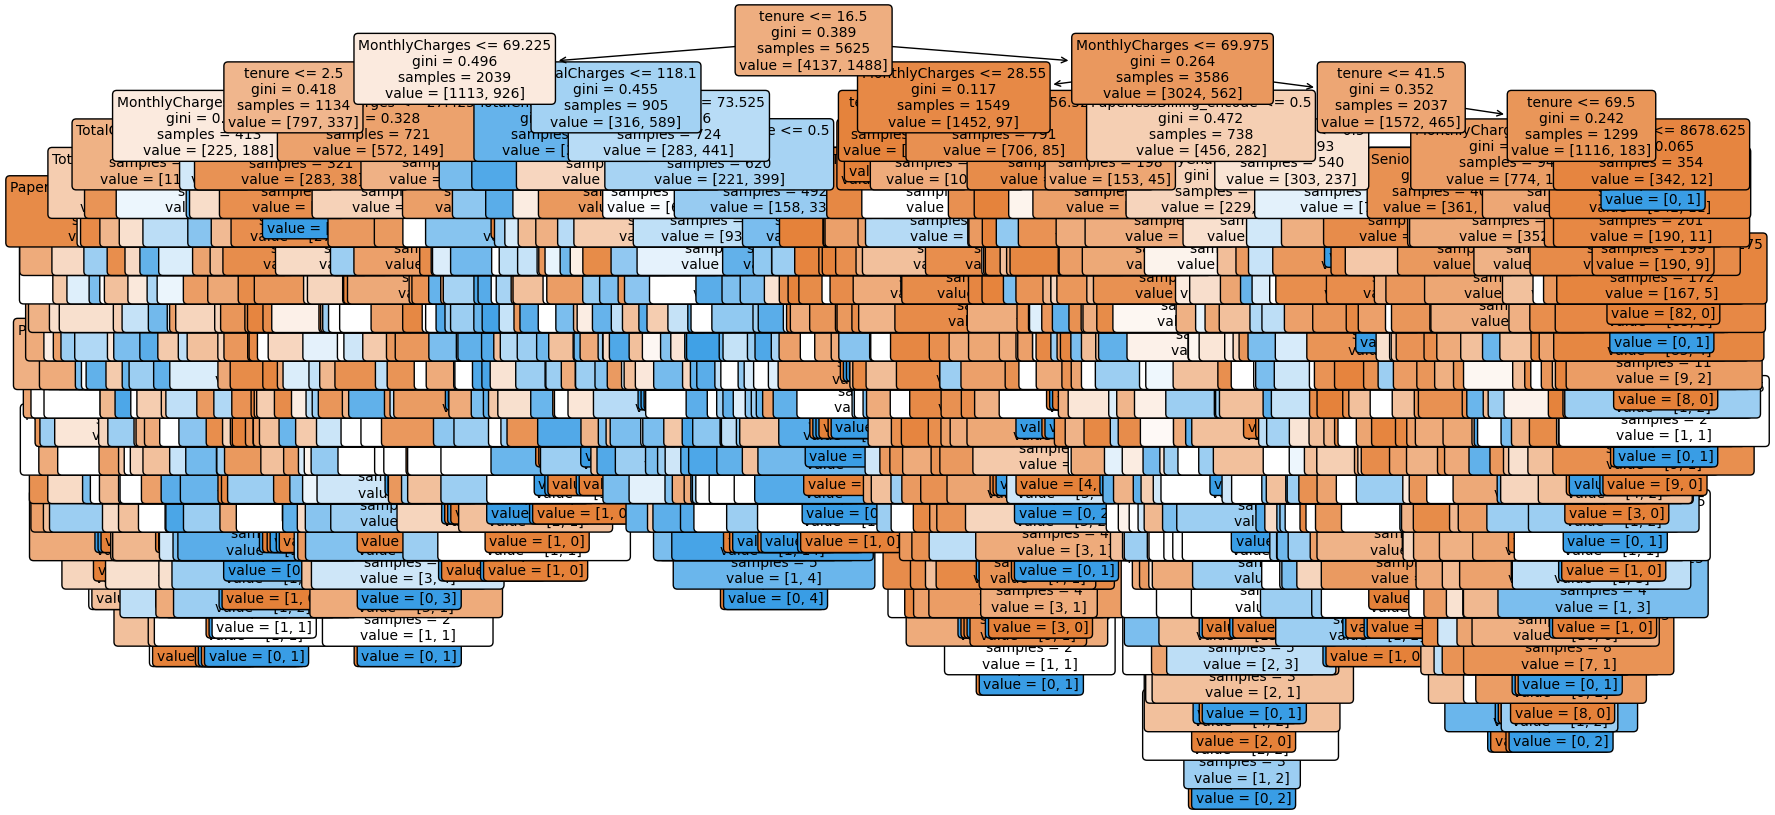

In [ ]:
# plot_tree 를 통해 tree 를 시각화 합니다.
# 시각화 할 때만 max_depth를 제한한것이고 실제 모델에서는 다른 값을 사용하게 됩니다.
# 위 예시 이미지를 참고합니다.
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
# 여기에 구현해 주세요.
plot_tree(model,feature_names=feature_names,filled=True,rounded=True,fontsize=10)

In [ ]:
# export_text 를 통해 문자( text )로 트리를 시각화 합니다.
# 너무 길어 한눈에 보기가 어려울 경우, max_depth 를 설정하면 특정 깊이까지만 보입니다.
from sklearn.tree import export_text
# 여기에 구현해 주세요.
tree = export_text(model,feature_names=feature_names.tolist(),max_depth=2,spacing=3,decimals=2,)
print(tree)

|--- tenure <= 16.50
|   |--- MonthlyCharges <= 69.22
|   |   |--- tenure <= 2.50
|   |   |   |--- truncated branch of depth 19
|   |   |--- tenure >  2.50
|   |   |   |--- truncated branch of depth 19
|   |--- MonthlyCharges >  69.22
|   |   |--- TotalCharges <= 118.10
|   |   |   |--- truncated branch of depth 16
|   |   |--- TotalCharges >  118.10
|   |   |   |--- truncated branch of depth 17
|--- tenure >  16.50
|   |--- MonthlyCharges <= 69.97
|   |   |--- MonthlyCharges <= 28.55
|   |   |   |--- truncated branch of depth 11
|   |   |--- MonthlyCharges >  28.55
|   |   |   |--- truncated branch of depth 20
|   |--- MonthlyCharges >  69.97
|   |   |--- tenure <= 41.50
|   |   |   |--- truncated branch of depth 24
|   |   |--- tenure >  41.50
|   |   |   |--- truncated branch of depth 22




### 3-2) 피처 중요도 시각화 하기

* 해당 이미지는 예시로 모델의 학습 결과에 따라 다르게 나올 수 있습니다.

<img src="https://i.imgur.com/EtcMpCy.png" width="500">

In [ ]:
# feature_importances_ 를 통해 모델의 피처 중요도를 추출합니다.

model.feature_importances_

array([0.02188759, 0.23581143, 0.35897419, 0.26144422, 0.03279168,
       0.02888372, 0.0267662 , 0.00698929, 0.02645167])

<Axes: >

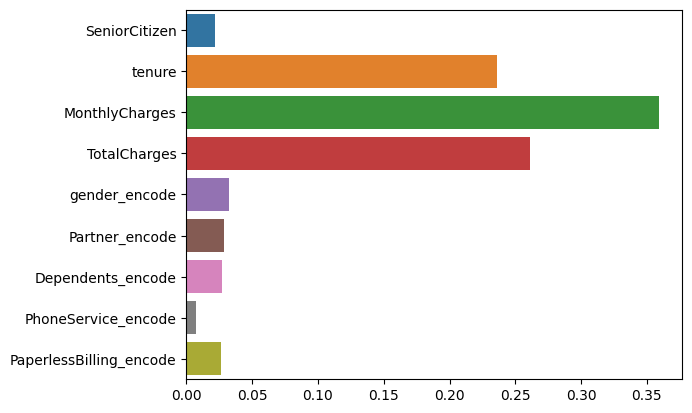

In [ ]:
# 피처 중요도를 시각화 합니다.
# 여기에 구현해 주세요. 위 예시 이미지를 참고합니다.
sns.barplot(x=model.feature_importances_, y=feature_names)

### 3-3) 정확도(Accuracy)구하기
- 모델이 얼마나 잘 예측했는지 측정해 봅니다.
- 시험을 보고 나서 몇 개 맞았는지 틀렸는지 채점해 보는 과정과 유사하다고 보면 됩니다.
- 실전 문제에서는 답이 없어서 우리가 예측을 해야겠지만 이 실습은 정답이 있는 모의고사 입니다.
- 모의고사를 보면 내 실력이 어느정도 되는지 예측해 보는 것처럼 점수를 측정해 봅니다.

In [ ]:
# 빈칸을 채워 정확도(accuracy) 를 구해주세요.
# 정답과 같이 예측한 값은 True 로 나오게 됩니다.
# True == 1 이기 때문에 평균값을 내면 정답을 맞춘 비율을 구할 수 있습니다.

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.7320540156361052